<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/Image_Processing_HomeWork/blob/main/Gusian_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage



In [32]:
from google.colab.patches import cv2_imshow

In [30]:
image = cv2.imread("pic2 (1).jpg", 0)

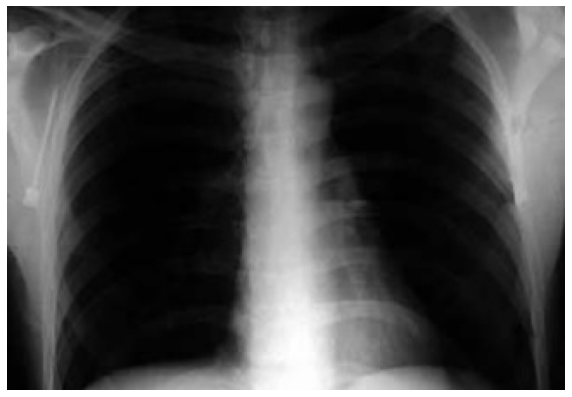

In [38]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp

im = np.mean(imread('pic2 (1).jpg'), axis=2) # assuming an RGB image
plt.figure(figsize=(10,10))
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [40]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


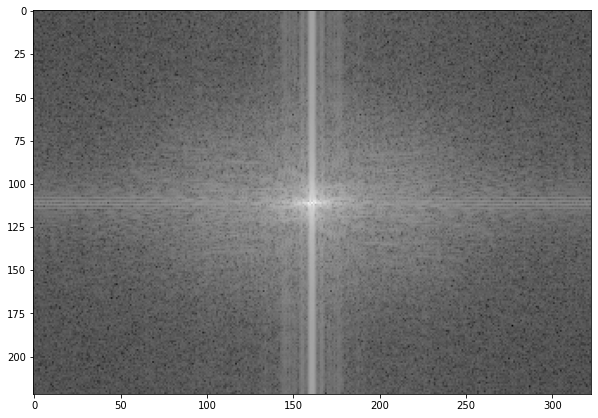

In [43]:
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

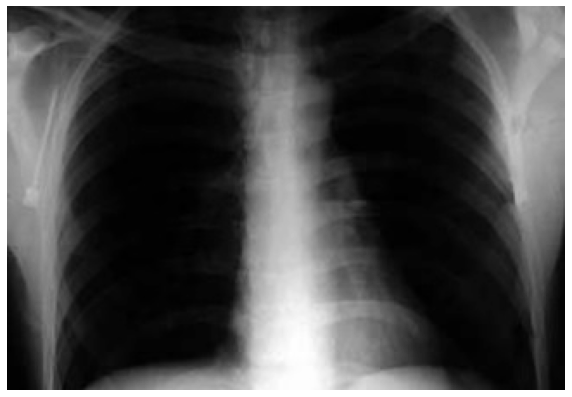

In [44]:
im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

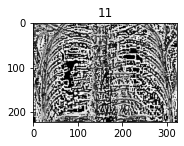

In [37]:

class HPF(object):
    def __init__(self, kernel, image):
        self.kernel = np.array(kernel)
        self.image = image

    def process(self):
        return ndimage.convolve(self.image, self.kernel)


if __name__ == "__main__":
    #enter ur image location
    image = cv2.imread("pic2 (1).jpg", 0)
    kernel3x3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    kernel5x5 = [[-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 2, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]]

    hpf1 = HPF(kernel3x3, image)
    hpfimage1 = hpf1.process()
    hpf2 = HPF(kernel5x5, image)
    hpfimage2 = hpf2.process()
    #subplot(121)
    #plot(hpfimage1,"3 3")
    #subplot(122)
    plot(hpfimage2,"11")
    plt.show()
    #cv2.imshow("3x3",hpfimage1)
    #cv2.imshow("5x5",hpfimage2)
    #cv2.waitKey()
    #cv2.destroyAllWindows()

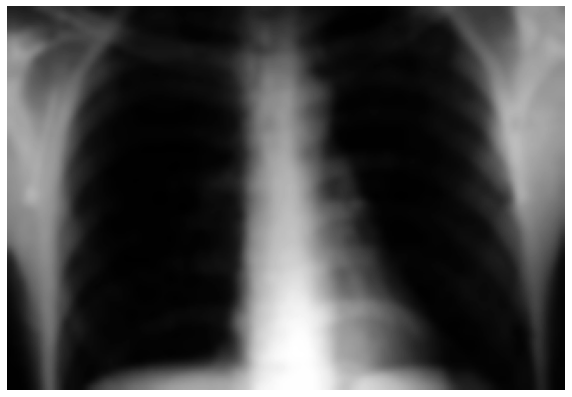

In [48]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
plt.figure(figsize=(10,10))
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

In [28]:
!pip install Image


In [29]:
#Load Data
from google.colab import files
uploaded= files.upload()

Saving pic2.jpg to pic2 (1).jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RuntimeError: ignored

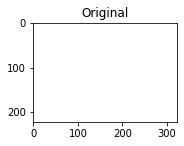

In [25]:

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open('pic2.jpg')
data = np.array(im, dtype=float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RuntimeError: ignored

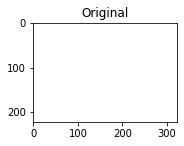

In [24]:


def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open('pic2.jpg')
data = np.array(im, dtype=float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $sigma = 3 pixels$')

plt.show()

In [20]:
import numpy as np
import cv2
from scipy import ndimage

class HPF(object):
    def __init__(self, kernel, image):
        self.kernel = np.array(kernel)
        self.image = image

    def process(self):
        return ndimage.convolve(self.image, self.kernel)


if __name__ == "__main__":
    #enter ur image location
    image = cv2.imread("pic2.jpg", 0)
    kernel3x3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    kernel5x5 = [[-1, -1, -1, -1, -1],
    [-1, 1, 2, 1, -1],
    [-1, 2, 4, 2, -1],
    [-1, 1, 2, 1, -1],
    [-1, -1, -1, -1, -1]]

    hpf1 = HPF(kernel3x3, image)
    hpfimage1 = hpf1.process()
    hpf2 = HPF(kernel5x5, image)
    hpfimage2 = hpf2.process()
    #cv2.imshow("3x3",hpfimage1)
    cv2.imshow("5x5",hpfimage2)
    cv2.waitKey()
    cv2.destroyAllWindows()

DisabledFunctionError: ignored

In [8]:


def plot(data, title):
   plot.i += 1
plt.subplot(2, 2, plot.i)
plt.imshow(data)
plt.gray()
plt.title(title)
plot.i = 0

# Load the data...
im = cv2.imread('pic2.jpg',0)
data = np.array(im, dtype = float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([
   [-1, -1, -1],
   [-1, 8, -1],
   [-1, -1, -1]
])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter
kernel = np.array([
   [-1, -1, -1, -1, -1],
   [-1, 1, 2, 1, -1],
   [-1, 2, 4, 2, -1],
   [-1, 1, 2, 1, -1],
   [-1, -1, -1, -1, -1]
])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original.Here, we 'll use a simple gaussian filter
# to "blur"(i.e.a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r 'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("GOPR0864.JPG") / float(2 ** 8)
plt.imshow(img)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data
import gravel
from skimage.filters
import difference_of_gaussians, window
from scipy.fftpack
import fftn, fftshift

image = gravel()
wimage = image * window('hann', image.shape) # window image to improve FFT
filtered_image = difference_of_gaussians(image, 1, 12)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))
ax[0, 0].imshow(image, cmap = 'gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap = 'magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[1, 0].imshow(filtered_image, cmap = 'gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap = 'magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
plt.show()

SyntaxError: ignored

In [12]:
# ImageFilter for using filter() function
from PIL import Image, ImageFilter

In [17]:
Image.open(image,mode='r')

AttributeError: ignored

In [11]:


  
# Opening the image 
# (R prefixed to string in order to deal with '\' in paths)
image = cv2.imread('pic2.jpg',0) #Image.open(r)
  
# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument
image = image.filter(ImageFilter.GaussianBlur)
  
# Displaying the image
image.show()

AttributeError: ignored